In [427]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

Import the data from the files, merging the same columns and checking for nan.

In [428]:
col_names = ["passedProto", "failedProto", "filter", "type", "location", "bins", "efficiency", "error"]

def_dataset = pd.read_csv('table.txt', sep=' ', names=col_names, header=None, na_filter=True)
func_dataset = pd.read_csv('tableWithFunc.txt', names=col_names, sep=' ', header=None, na_filter=True)

df = pd.concat([def_dataset, func_dataset]).drop_duplicates().reset_index(drop=True)

# remove negative efficiency
df = df[df["efficiency"] > 0.4]
df = df[df["efficiency"] < 1]

# print df
df

,passedProto,failedProto,filter,type,location,bins,efficiency,error
0,rettaBigaus,expBigaus,default,fondo,barrel,40,0.819922,0.004440
1,rettaBigaus,expBigaus,default,picco,barrel,40,0.816179,0.004575
2,rettaBigaus,expBigaus,default,fondo,endcaps,40,0.729136,0.008083
3,rettaBigaus,expBigaus,default,picco,endcaps,40,0.726250,0.008261
4,rettaBigaus,expBigaus,isPositive,fondo,barrel,40,0.820736,0.006319
...,...,...,...,...,...,...,...,...
499,expBigaus,rettaBigaus,isPtBin3,picco,endcaps,100,0.624376,0.019223
500,expBigaus,expBigaus,isPtBin3,fondo,barrel,100,0.737960,0.009451
501,expBigaus,expBigaus,isPtBin3,picco,barrel,100,0.755670,0.009530
502,expBigaus,expBigaus,isPtBin3,fondo,endcaps,100,0.682508,0.020432


Grafico sommativo per sintetizzare tutti i risultati ottenuti da MC_4Nicola.
Si può vedere come ci siano due tendenze sulle efficienze e una serie di picchi 
per gli errori.

In [429]:
# image path
path = 'presentazione/'

# standard cuts
standardcut = df.query(' passedProto == "rettaBigaus" and failedProto == "expBigaus" ')

# the reference sample has 50 bins, it best explains the others
reference = standardcut.query('filter == "default" and bins == 50 and type == "fondo" ')

# plot the reference to a graph
def pltStandard(graph):
    graph.errorbar(reference['error'], reference['efficiency'], yerr=reference['error'],
              fmt='o',
              ms=4,
              mfc='white',
              mec='red',
              c='red',
              capsize=4,
              zorder=1,
              )
def showSelected(cut, hue='location', cmap = ''):
    if(cmap == ''):
        g = sns.jointplot(data=cut, x='error', y='efficiency', hue=hue, s=20, alpha = 0.8)
    else:
        g = sns.jointplot(data=cut, x='error', y='efficiency', 
                          hue=hue, s=20, alpha = 0.8,
                          palette=cmap)
    g.ax_joint.scatter(df['error'], df['efficiency'], s=6, c = 'pink', 
                       alpha=0.2, zorder=0)
    sns.kdeplot(data=cut,
            x='error',
            y='efficiency',
            hue='location',
            levels=1,
            legend=False,
            alpha=0.3,
            cut=3,
            ax=g.ax_joint)
    return g
    

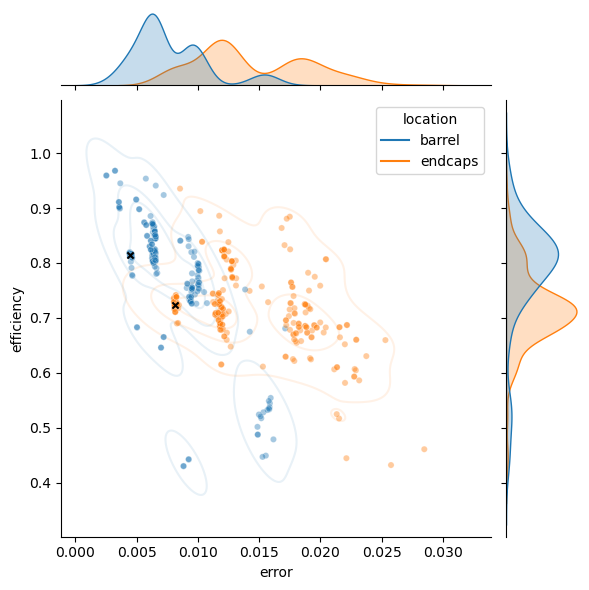

In [430]:
g = sns.jointplot(data=df, x='error', y='efficiency', hue='location', s=20, alpha = 0.4)
g.plot_joint(sns.kdeplot, zorder=0, levels=4, alpha = 0.1)
g.ax_joint.scatter(reference['error'], reference['efficiency'], s=20, 
                   c='k', marker='x', zorder=1)
g.savefig(path + 'MC_4NIC_all.png')


c:\Users\alber\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


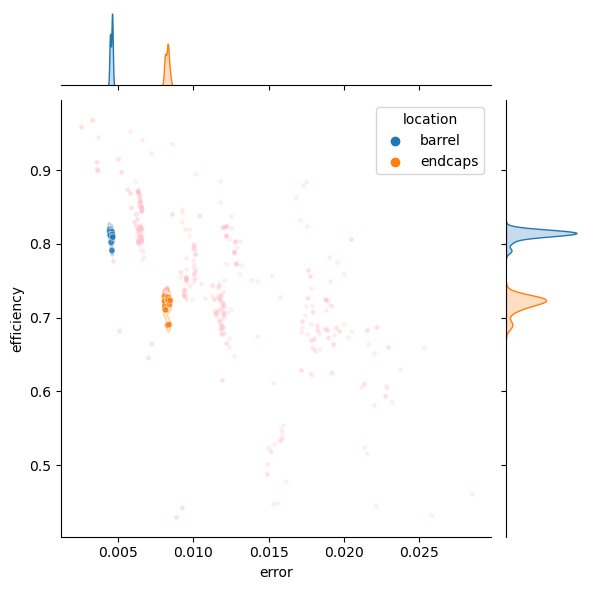

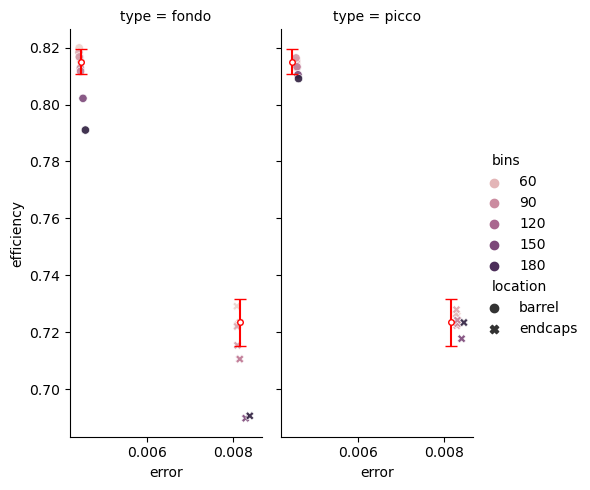

In [431]:
# STANDARD SAMPLE CUT
cut = df.query('filter == "default" and passedProto == "rettaBigaus" and failedProto == "expBigaus"')

g = showSelected(cut)
g.savefig(path + 'MC_4NIC_allSamplecut.png')

g = sns.relplot(data=cut, kind='scatter', x="error", y="efficiency", style="location", alpha = .9, 
                hue='bins', height=5, aspect=.5, col='type')
pltStandard(g.axes[0,0])
pltStandard(g.axes[0,1])
g.savefig(path + 'MC_4NIC_samplecut.png')


c:\Users\alber\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


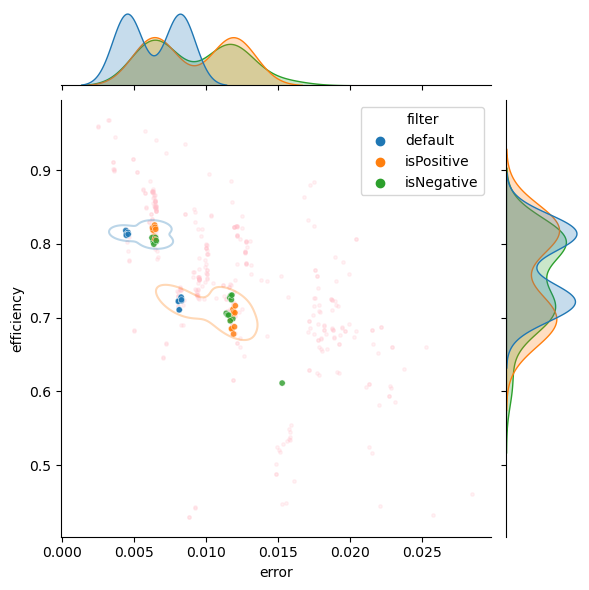

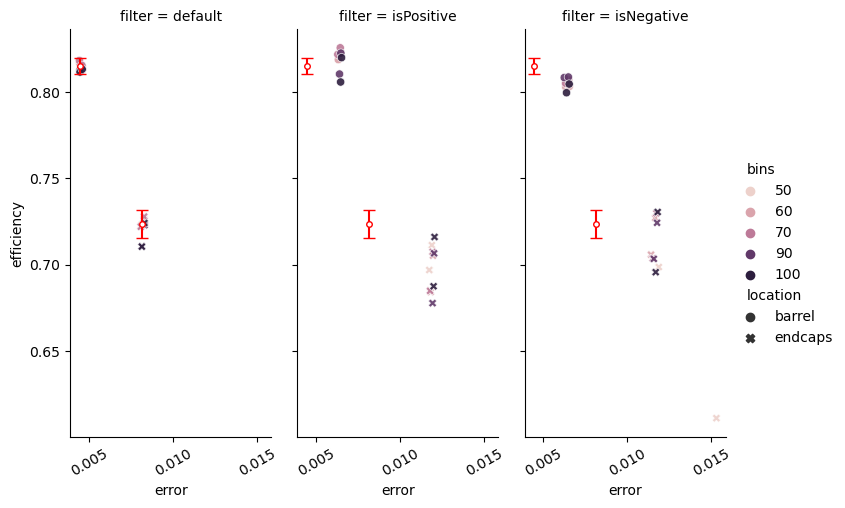

In [432]:
# divide by charge
cut = standardcut[standardcut['filter'].isin(['default', 'isPositive', 'isNegative'])]
cut = cut[cut['bins'].isin([50,60,70,90,100])]

showSelected(cut, 'filter')
g.savefig(path + 'MC_4NIC_allCharge.png')

g = sns.relplot(data=cut, kind='scatter', x="error", y="efficiency", style="location", alpha = .9, 
                hue='bins', height=5, aspect=.5, col='filter')
g.set_xticklabels(rotation = 30)
pltStandard(g.axes[0,0])
pltStandard(g.axes[0,1])
pltStandard(g.axes[0,2])
g.savefig(path + 'MC_4NIC_charge.png')

c:\Users\alber\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


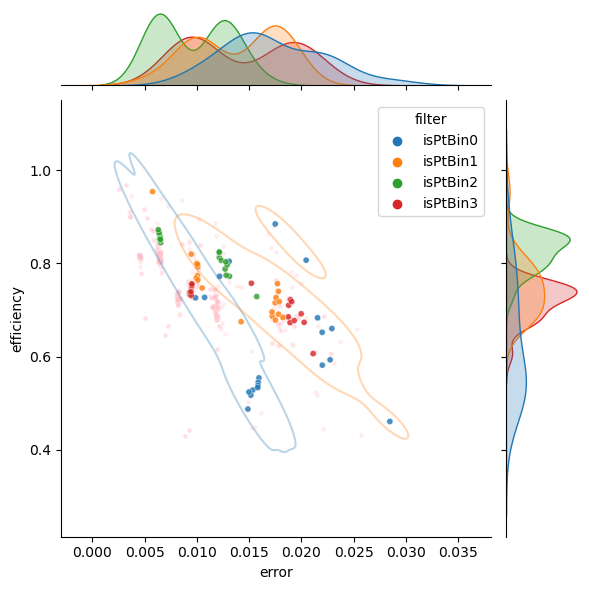

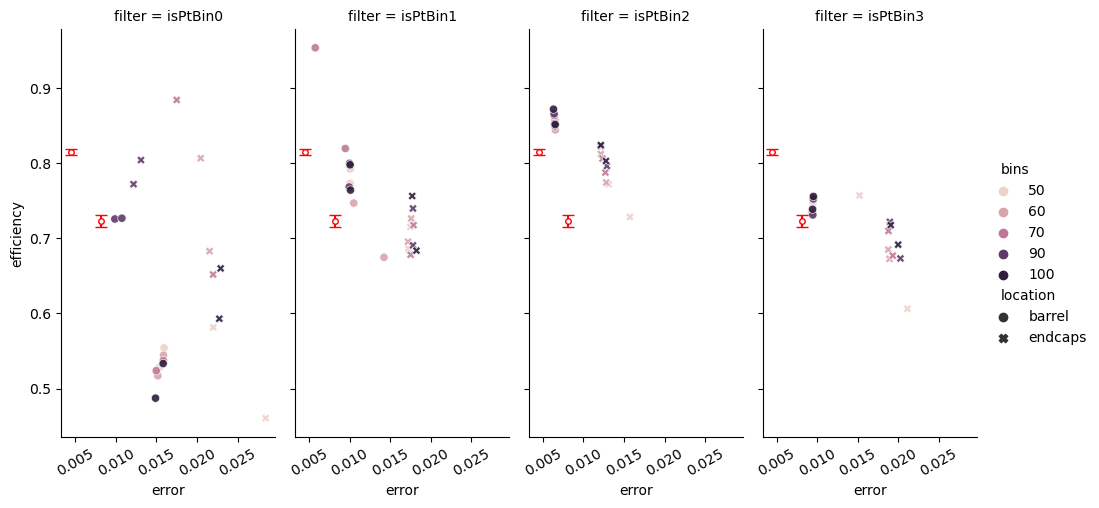

In [433]:
# pt analisi
cut = standardcut[standardcut['filter'].isin([ 'default','isPositive', 'isNegative']).apply(lambda x: not x)]
cut = cut[cut['bins'].isin([50,60,70,90,100])]

g = showSelected(cut, 'filter')
g.savefig(path + 'MC_4NIC_allPt.png')

g = sns.relplot(data=cut, kind='scatter', x="error", y="efficiency", style="location", alpha = .9, 
                hue='bins', height=5, aspect=.5, col='filter')
g.set_xticklabels(rotation = 30)

for i in range(4):
    pltStandard(g.axes[0,i])
g.savefig(path + 'MC_4NIC_pt.png')


c:\Users\alber\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\alber\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


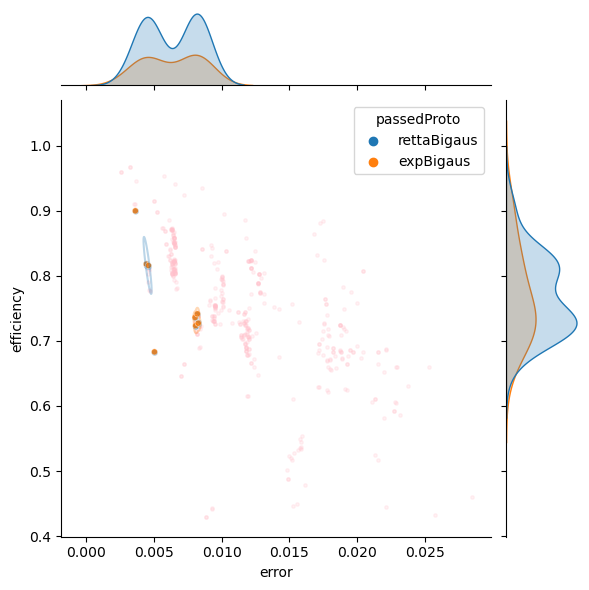

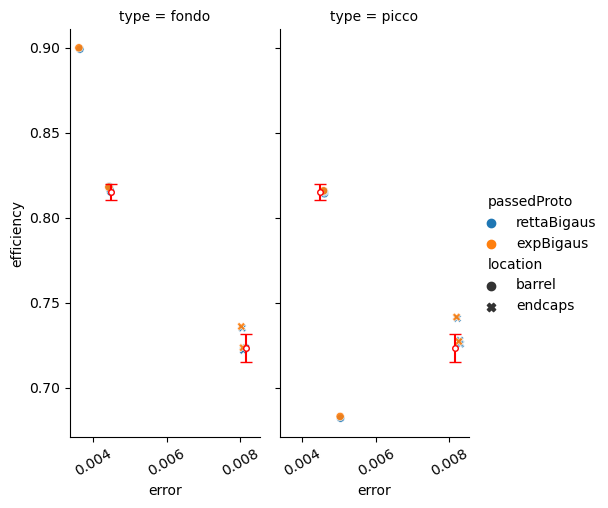

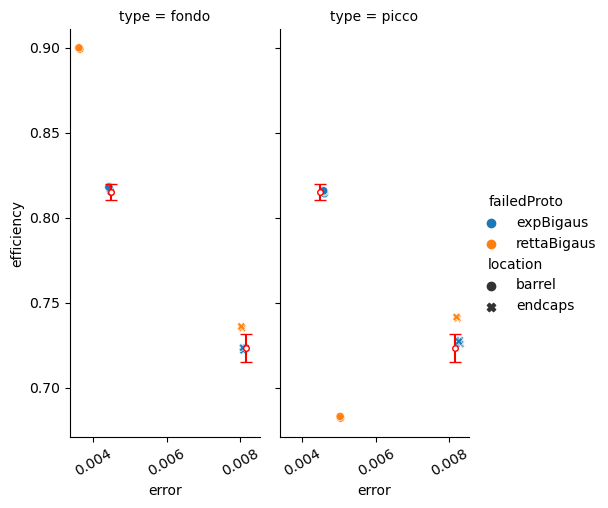

In [434]:
# what happens when changing the fit function?
cut = df.query(' filter == "default"')
cut = cut[cut['bins'].isin([ 50, 60, 70])]

showSelected(cut, 'passedProto')
g.savefig(path + 'MC_4NIC_allFitfunc.png')

g = sns.relplot(data=cut, kind='scatter', x="error", y="efficiency", style="location", alpha = .9, 
                hue='passedProto', height=5, aspect=.5, col="type")
g.set_xticklabels(rotation = 30)

for i in range(2):
    pltStandard(g.axes[0,i])
g.savefig(path + 'MC_4NIC_fitfuncPassed.png')

g = sns.relplot(data=cut, kind='scatter', x="error", y="efficiency", style="location", alpha = .9, 
                hue='failedProto', height=5, aspect=.5, col="type")
g.set_xticklabels(rotation = 30)

for i in range(2):
    pltStandard(g.axes[0,i])
g.savefig(path + 'MC_4NIC_fitFuncFailed.png')

c:\Users\alber\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


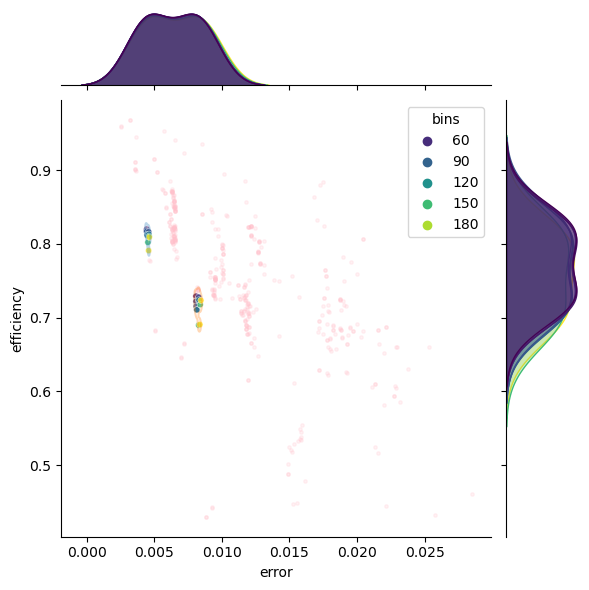

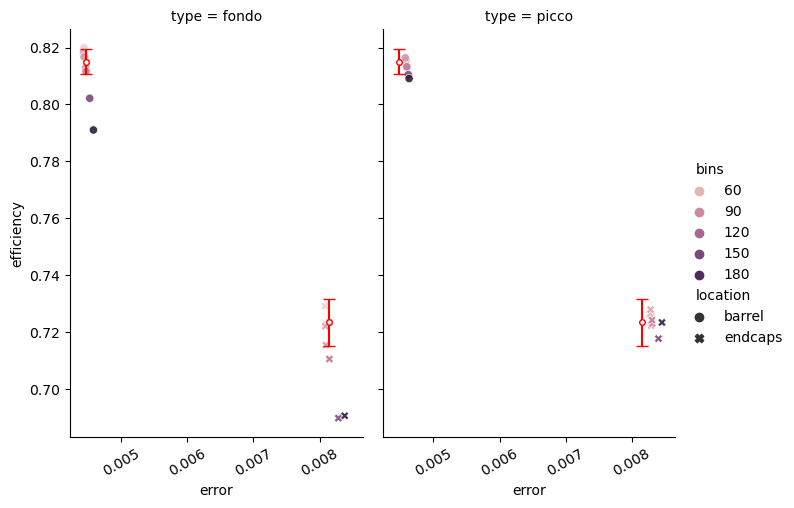

In [435]:
# bin analisi 
cut = standardcut[standardcut['filter'] == 'default']

showSelected(cut, 'bins', 'viridis')
g.savefig(path + 'MC_4NIC_allBinsStandard.png')

g = sns.relplot(data=cut, kind='scatter', x="error", y="efficiency", style="location", alpha = .9, 
                hue='bins', height=5, aspect=.7, col='type')
g.set_xticklabels(rotation = 30)

for i in range(2):
    pltStandard(g.axes[0,i])
g.savefig(path + 'MC_4NIC_binsStandard.png')

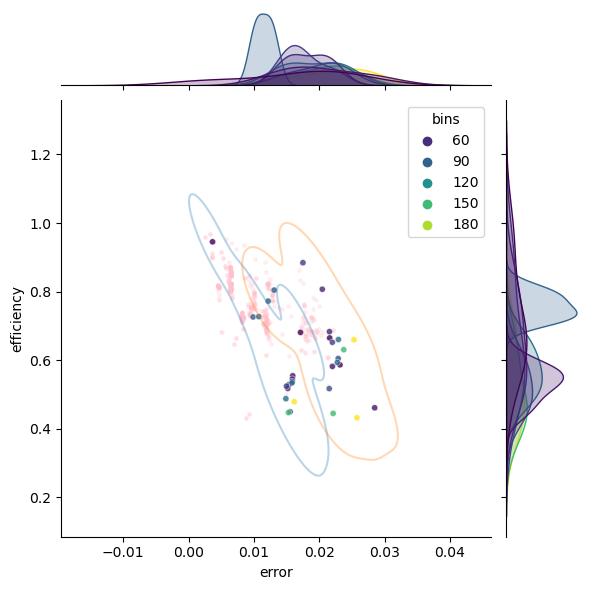

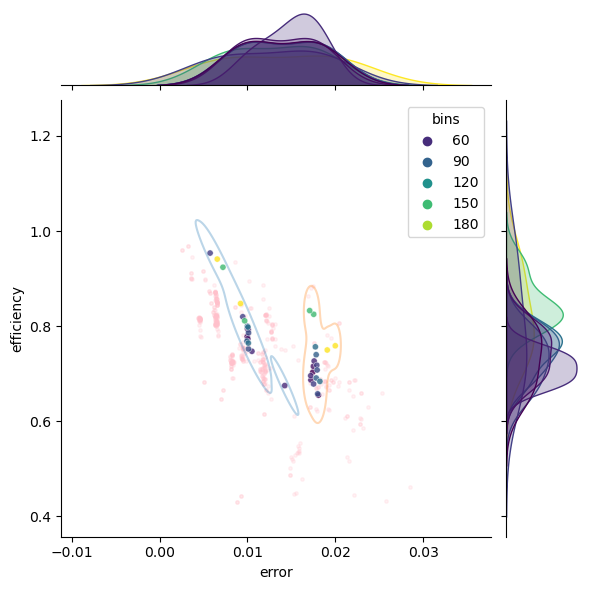

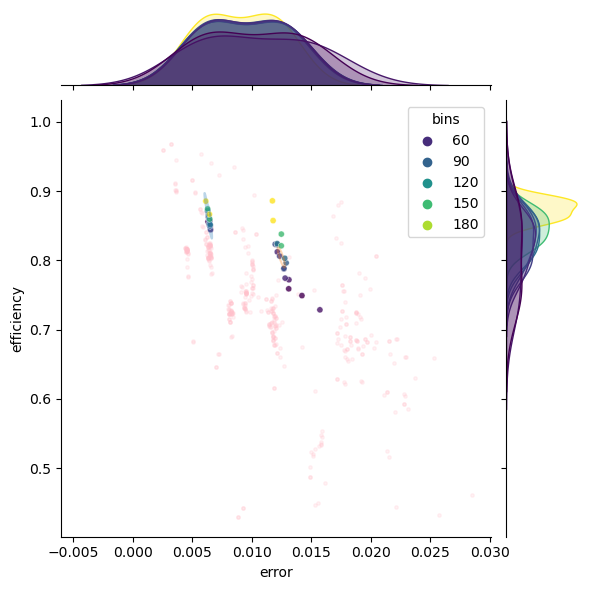

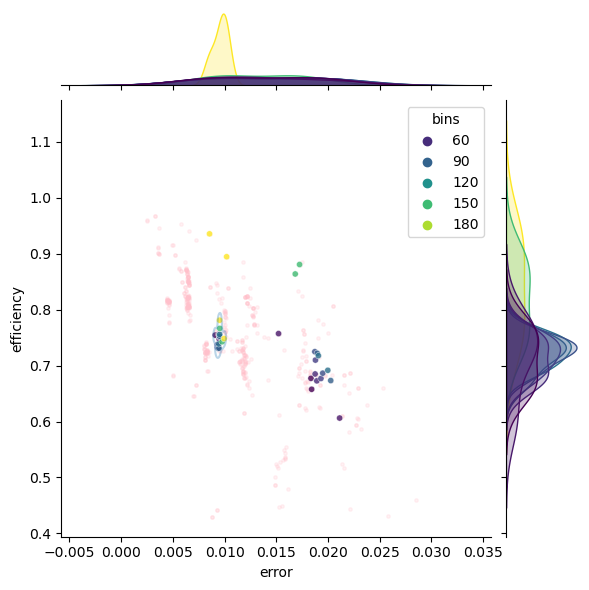

In [436]:
# bin analisi 
for i in range(4):
    cut = standardcut[standardcut['filter'].isin([ f'isPtBin{i}',])]
    showSelected(cut, 'bins', 'viridis')
    g.savefig(path + f'MC_4NIC_allBinsPt{i}.png')